## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 03 : Principal Component Analysis</div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [2]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "60236"

In [3]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		60236
Start: 		2023-09-20 13:22:27.818662
Device ID: 	12377e7e-577e-11ee-b7d3-2c3b70a37f3c



---

### Dataset yang dipakai:

1. gpa_study_hours.csv – sumber : https://www.kaggle.com/datasets/joebeachcapital/gpa-study-hours
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing system library

In [4]:
import pandas as pd
from io import StringIO
import sys

#### Importing numpy library

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

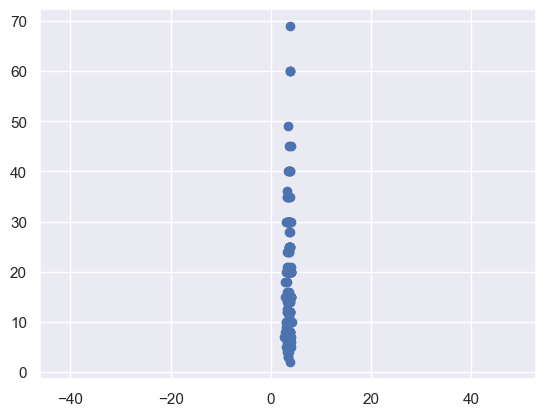

In [6]:
df = pd.read_csv('gpa_study_hours.csv')
plt.scatter(df['gpa'], df['study_hours'])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [8]:
print(pca.components_)

[[ 0.00333037  0.99999445]
 [-0.99999445  0.00333037]]


In [9]:
print(pca.explained_variance_)

[1.30166261e+02 8.00569184e-02]


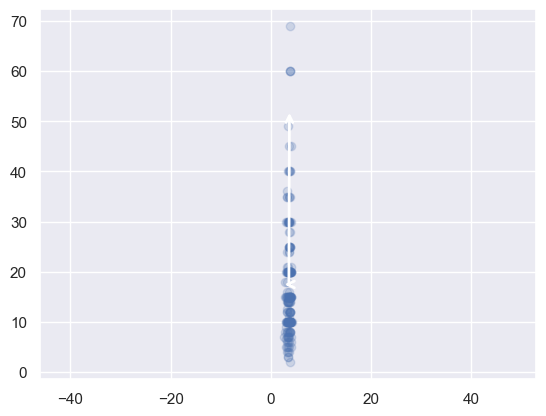

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
#plot data
plt.scatter(df['gpa'], df['study_hours'], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [24]:
pca = PCA(n_components=1)
pca.fit(df)
X_pca = pca.transform(df)
print("original shape: ", df.shape)
print("transformed shape: ", df_pca.shape)

original shape:  (193, 2)
transformed shape:  (193, 1)


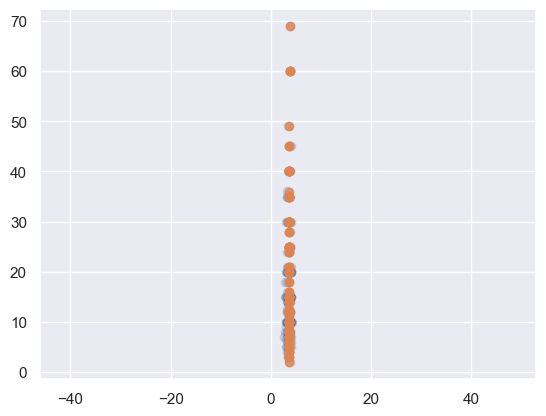

In [25]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(df['gpa'], df['study_hours'], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [11]:
dataMNIST = pd.read_csv('mnist_test.csv')
dataMNIST = dataMNIST.drop(columns="label").to_numpy()
dataMNIST

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Text(0, 0.5, 'cumulative esplained variance')

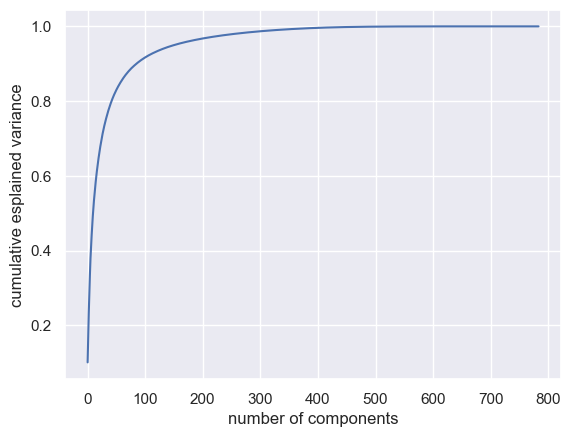

In [12]:
pca = PCA().fit(dataMNIST)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative esplained variance')

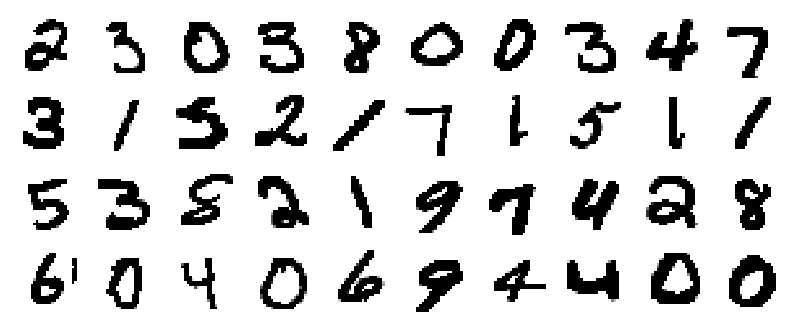

In [15]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
plot_digits(dataMNIST)

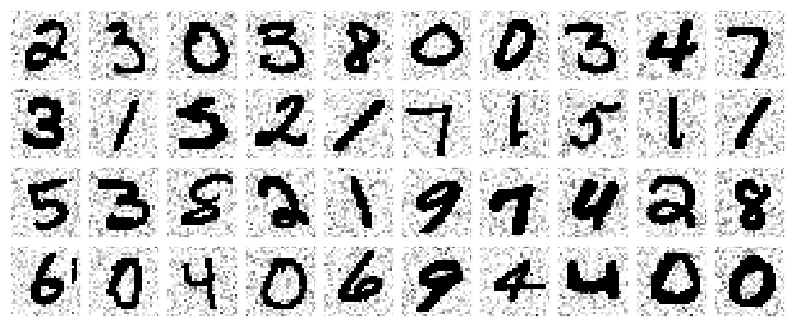

In [17]:
np.random.seed(42)
noisy = np.random.normal(dataMNIST.data, 4)
plot_digits(noisy)


In [18]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

11

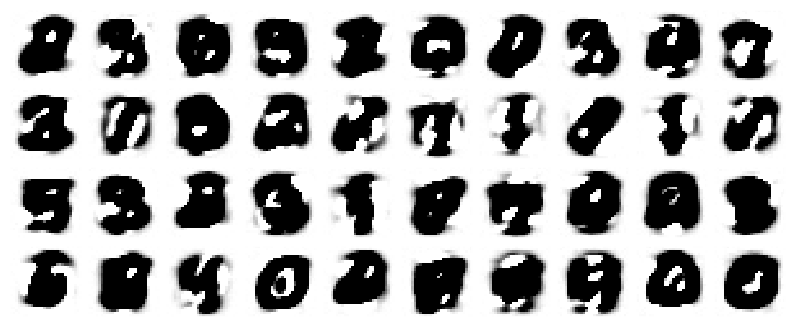

In [19]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - nilai variance pertama (1.30166261e+02) adalah nilai varians dari data GPA. Varians yang tinggi dalam konteks ini dapat mengindikasikan bahwa terdapat variasi yang signifikan dalam nilai-nilai GPA antara siswa atau mahasiswa yang berbeda dalam hal lama waktu belajar. Ini bisa berarti bahwa ada siswa yang memiliki nilai GPA yang jauh lebih tinggi atau lebih rendah daripada yang lain karena perbedaan dalam lama waktu belajar mereka.
    - nilai variance kedua (8.00569184e-02) yang sangat kecil mungkin menunjukkan bahwa ada sedikit variasi dalam nilai-nilai GPA di antara siswa atau mahasiswa yang berbeda dalam hal lama waktu belajar. Ini bisa berarti bahwa sebagian besar siswa atau mahasiswa memiliki nilai-nilai GPA yang serupa, meskipun ada perbedaan dalam lama waktu belajar mereka.
    - plot PCA hanya menampilkan gambar dari dataset cvs yang memiliki pixel, kemudian ditampilkan dan diberi macam-macam filter

---

In [20]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		60236
Time-stamp:	2023-09-20 13:26:03.674972


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [1]:
!jupyter nbconvert --to html "./IF540L_Kelas_EL_laporan_M03_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_EL_laporan_M03_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 865077 bytes to IF540L_Kelas_EL_laporan_M03_00000060236_Nisaul Fadhilah.html
